# Intro

Dans cette partie, nous allons traiter/analyser nos données et justifier nos choix pratiques/éthiques au niveau des features choisis.

In [5]:
import pandas as pd
from datetime import datetime

#ouverture Mise en Dataframe des données
employee_survey_data_path = "datas/employee_survey_data.csv"
manager_survey_data_path = "datas/manager_survey_data.csv"
general_data_path = "datas/general_data.csv"
in_time_data_path = "datas/in_time.csv"
out_time_data_path = "datas/out_time.csv"

# employee_survey_data = pd.read_csv(employee_survey_data_path)
# manager_survey_data = pd.read_csv(manager_survey_data_path)
# general_data = pd.read_csv(general_data_path)
in_time_data = pd.read_csv(in_time_data_path)
out_time_data = pd.read_csv(out_time_data_path)

datas_raw = [0]*4

datas_raw[1] = pd.read_csv(employee_survey_data_path)
datas_raw[0] = pd.read_csv(general_data_path)
datas_raw[2] = pd.read_csv(manager_survey_data_path)




def merge_datas(datas):
    merged_datas = datas[0]
    for i in range(len(datas)-1):
        merged_datas = pd.merge(merged_datas, datas[i+1], on='EmployeeID', how='inner')
    return merged_datas


In [6]:
def to_datetime(strdate):
    if type(strdate) == str:
        return datetime.strptime(strdate, "%Y-%m-%d %H:%M:%S").timestamp()
    else:
        return 0



def get_working_time(in_time_data, out_time_data):
    out_time_df = (
        out_time_data
        .iloc[:,1:]
        .applymap(lambda x: to_datetime(x))
    )
    in_time_df = (
        in_time_data
        .iloc[:,1:]
        .applymap(lambda x: to_datetime(x))
    )
    hours_per_day = out_time_df - in_time_df
    in_time_data["MeanWorkingHours"] = hours_per_day.mean(axis = 1)/3600
    return in_time_data[["EmployeeID", "MeanWorkingHours"]]

datas_raw[3] = get_working_time(in_time_data, out_time_data)

datas_raw[3]

,EmployeeID,MeanWorkingHours
0,1,6.554356
1,2,6.979604
2,3,6.502698
3,4,6.477067
4,5,7.515375
...,...,...
4405,4406,7.934534
4406,4407,5.626061
4407,4408,6.820812
4408,4409,8.765193


merging:

In [7]:
datas = merge_datas(datas_raw)
datas

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,6.554356
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,6.979604
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,6.502698
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,6.477067
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,7.515375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.0,1.0,3.0,3,3,7.934534
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.0,4.0,3.0,2,3,5.626061
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.0,3.0,3.0,3,4,6.820812
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,4.0,1.0,3.0,2,3,8.765193


# Filtre Ethique
ici, on enleve les features ethiquement discutables. On a identifié:
- age
- Gender
- MaritalStatus

In [8]:
datas.drop(columns=["Age","Gender","MaritalStatus"], axis=1, inplace=True, errors="ignore")
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  Over18                   4410 non-null   object 
 13  PercentSalaryHike        4410 non-null   int64  
 14  StandardHours           

# Traitement des données non numériques

Il nous reste 4382 instances, on a donc toujours largement assez de données

Il faut maintenant gérer nos données qui sont autres que numériques

Premièrement, nous allons quantifier la fréquence de voyages d'affaires de nos salariés:

In [9]:
#import numpy as np
from sklearn.preprocessing import OrdinalEncoder


mapping_dict = {'Non-Travel': 1, 'Travel_Rarely': 2, 'Travel_Frequently': 3}

datas['BusinessTravel'] = datas['BusinessTravel'].map(mapping_dict)


# encoder.fit()

In [10]:
mapping_dict = {'No': 0, 'Yes': 1}
datas['Attrition'] = datas['Attrition'].map(mapping_dict)

datas

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingHours
0,0,2,Sales,6,2,Life Sciences,1,1,1,Healthcare Representative,...,6,1,0,0,3.0,4.0,2.0,3,3,6.554356
1,1,3,Research & Development,10,1,Life Sciences,1,2,1,Research Scientist,...,3,5,1,4,3.0,2.0,4.0,2,4,6.979604
2,0,3,Research & Development,17,4,Other,1,3,4,Sales Executive,...,2,5,0,3,2.0,2.0,1.0,3,3,6.502698
3,0,1,Research & Development,2,5,Life Sciences,1,4,3,Human Resources,...,5,8,7,5,4.0,4.0,3.0,2,3,6.477067
4,0,2,Research & Development,10,1,Medical,1,5,1,Sales Executive,...,2,6,0,4,4.0,1.0,3.0,3,3,7.515375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,2,Research & Development,5,4,Medical,1,4406,1,Research Scientist,...,5,3,0,2,4.0,1.0,3.0,3,3,7.934534
4406,0,2,Research & Development,2,4,Medical,1,4407,1,Laboratory Technician,...,2,3,0,2,4.0,4.0,3.0,2,3,5.626061
4407,0,2,Research & Development,25,2,Life Sciences,1,4408,2,Sales Executive,...,4,4,1,2,1.0,3.0,3.0,3,4,6.820812
4408,0,2,Sales,18,2,Medical,1,4409,1,Laboratory Technician,...,2,9,7,8,4.0,1.0,3.0,2,3,8.765193


En explorant nos données, on remarque qu'il y a des données uniques pour toutes nos itérations:

In [11]:

#clean les donnees string ici avant ce bloc!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#datas.hist(bins=50, figsize=(20,15))

on peut donc enlever:
- EmployeeCount
- Over18
- StandardHours

In [12]:
datas.drop(columns=["EmployeeCount","Over18","StandardHours"], errors="ignore", inplace=True)
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   int64  
 1   BusinessTravel           4410 non-null   int64  
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

Faisons maintenant des OneHotEncoders des données string restantes

In [13]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
encoded_datas_array = one_hot_encoder.fit_transform(datas[[
    "EducationField", "Department", "JobRole",]]).toarray()
encoded_datas_labels = one_hot_encoder.categories_
encoded_datas_labels = np.hstack([
    ["EducationField_" + x for x in encoded_datas_labels[0]],
    ["Department_" + x for x in encoded_datas_labels[1]],
    ["JobRole_" + x for x in encoded_datas_labels[2]]
    ])
encoded_data = pd.DataFrame(encoded_datas_array, columns=encoded_datas_labels)
#encoded_data["EmployeeID"] = datas["EmployeeID"]


datas = datas.join(encoded_data)
datas.drop(['EducationField', 'Department', "JobRole"], axis=1, inplace=True, errors="ignore")
datas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4410 non-null   int64  
 1   BusinessTravel                     4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeID                         4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4391 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StockOptionLevel                   4410 non-null   int64  
 10  TotalWorkingYears                  4401 non-null   float64
 11  TrainingTimesLastYear              4410 non-null   int64

# Vérification d'exhaustivité
Dans un premier temps, on regarde les données pour voir s'il y a des features manquantes pour certaines instances.

In [14]:
datas = datas.dropna(subset=datas.columns)
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4300 non-null   int64  
 1   BusinessTravel                     4300 non-null   int64  
 2   DistanceFromHome                   4300 non-null   int64  
 3   Education                          4300 non-null   int64  
 4   EmployeeID                         4300 non-null   int64  
 5   JobLevel                           4300 non-null   int64  
 6   MonthlyIncome                      4300 non-null   int64  
 7   NumCompaniesWorked                 4300 non-null   float64
 8   PercentSalaryHike                  4300 non-null   int64  
 9   StockOptionLevel                   4300 non-null   int64  
 10  TotalWorkingYears                  4300 non-null   float64
 11  TrainingTimesLastYear              4300 non-null   int64  
 1

# Scaling
Ici, nous allons mettre toutes nos valeurs sur la même échelle. 

In [15]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(datas)
datas_scaled = pd.DataFrame(std_scale.transform(datas), columns=datas.columns)

# Choix des features


Attrition                            1.000000
MeanWorkingHours                     0.195102
BusinessTravel                       0.122725
EducationField_Human Resources       0.089159
Department_Human Resources           0.074338
JobRole_Research Director            0.044520
NumCompaniesWorked                   0.043911
PercentSalaryHike                    0.034425
JobRole_Research Scientist           0.030277
PerformanceRating                    0.026262
EducationField_Life Sciences         0.012283
JobRole_Sales Executive              0.011370
JobRole_Laboratory Technician       -0.000584
EmployeeID                          -0.001707
EducationField_Medical              -0.001983
EducationField_Marketing            -0.003655
StockOptionLevel                    -0.007971
JobRole_Sales Representative        -0.008109
DistanceFromHome                    -0.008314
JobRole_Human Resources             -0.013227
JobRole_Healthcare Representative   -0.013255
Department_Research & Development 

<Axes: >

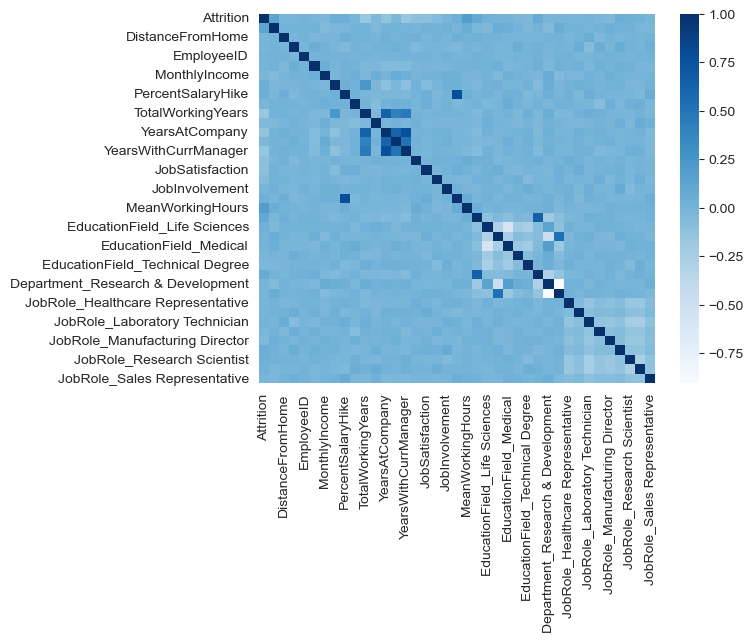

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr =datas_scaled.corr()
print(corr["Attrition"].sort_values(ascending=False))
sns.heatmap(corr, cmap=plt.cm.Blues)

<Axes: >

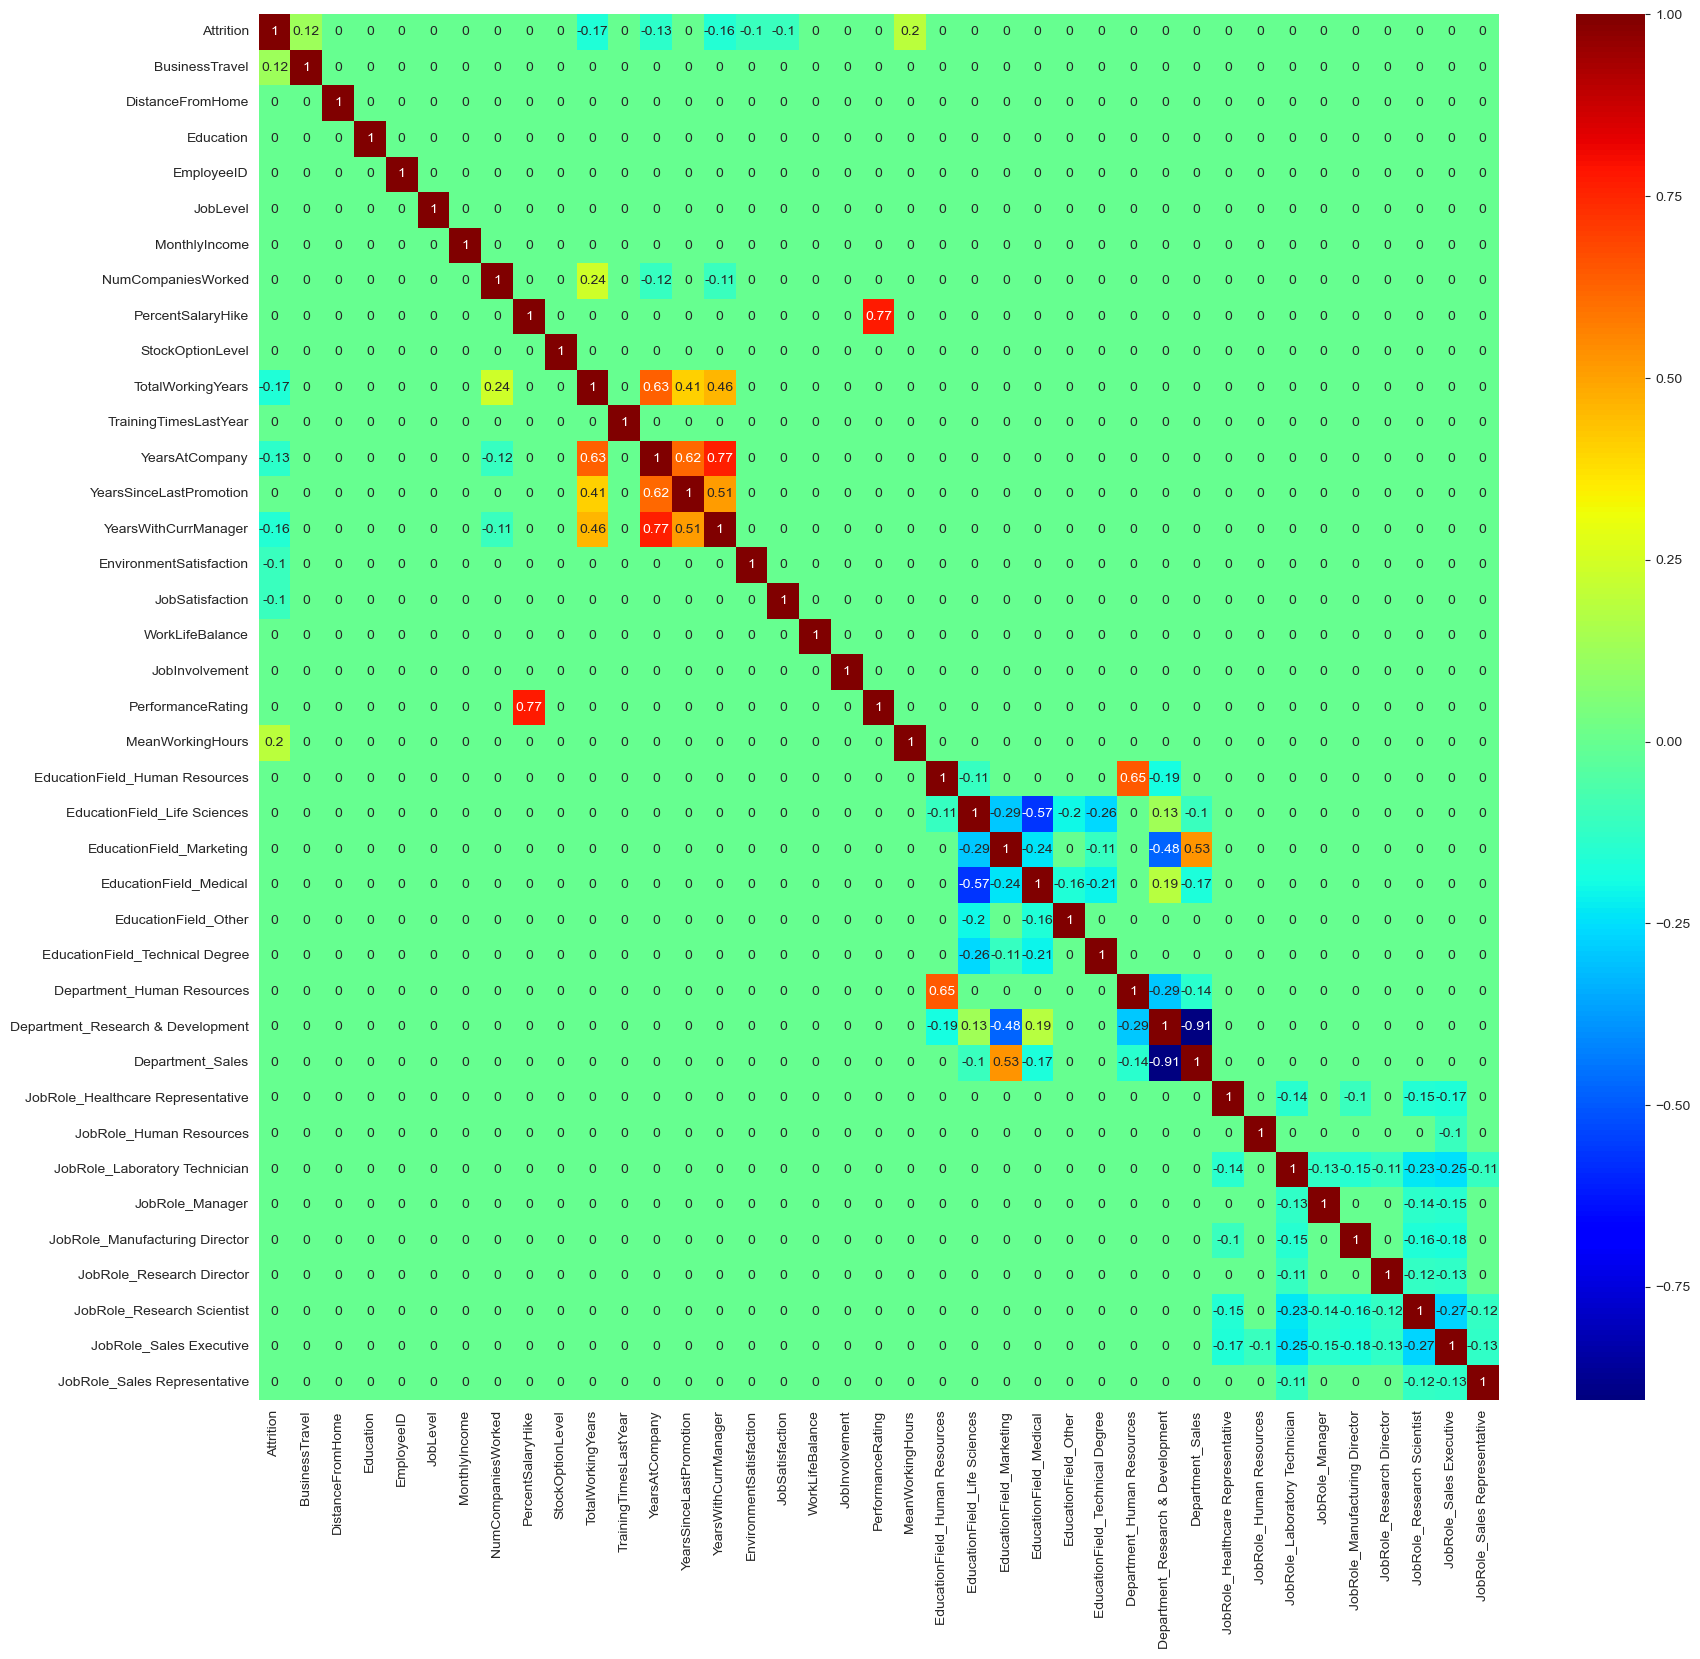

In [17]:
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if abs(corr.iloc[i, j]) < 0.1:
            corr.iloc[i, j] = 0

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap=plt.get_cmap("jet"))

Après analyse, nous prévoyons de garder:
- MeanWorkingHours
- BusinessTravel
- EducationField_Human Resources
- WorkLifeBalance
- JobSatisfaction
- EnvironmentSatisfaction
- YearsAtCompany
- YearsWithCurrManager
- TotalWorkingYears


Avant de continuer, mettons nos données dans un nouveau CSV.

In [18]:
datas_scaled.to_csv('datas/cleanedData.csv', index=False)

In [19]:
datas["Attrition"].to_csv('datas/labels.csv', index=False)

Ainsi, on a plus besoin de relancer les blocs d'avant pour avoir nos données propres.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data = pd.read_csv("datas/cleanedData.csv")
labels = pd.read_csv("datas/labels.csv")
cleaned_data.drop("Attrition", axis=1, inplace=True)
cleaned_data.insert(1,"Attrition", labels["Attrition"])
cleaned_data

,BusinessTravel,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,-0.161282,0,-0.394993,-0.891282,-1.738009,-0.964277,1.405193,-0.677226,-1.149725,-0.931939,...,1.513267,3.225808,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
1,1.718161,1,0.099071,-1.867220,-1.737223,-0.964277,-0.492557,-1.077952,2.126858,0.239797,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
2,1.718161,0,0.963683,1.060595,-1.736437,1.746964,2.725773,-0.677226,-0.057531,2.583269,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
3,-2.040726,0,-0.889057,2.036534,-1.735651,0.843217,0.385846,0.124225,-1.149725,2.583269,...,-0.660822,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4,-0.161282,0,0.099071,-1.867220,-1.734864,-0.964277,-0.885202,0.524950,-0.876677,1.411533,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,-0.161282,0,-0.642025,0.084657,1.724337,-0.060530,-0.630737,-0.677226,0.761615,-0.931939,...,1.513267,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4296,-0.161282,0,-0.518509,1.060595,1.725123,-0.964277,-0.101400,0.124225,0.488567,0.239797,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
4297,-0.161282,0,-0.889057,1.060595,1.725910,-0.964277,-0.813561,-0.276501,-0.057531,-0.931939,...,-0.660822,-0.310000,-0.192728,2.163404,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4298,-0.161282,0,1.951811,-0.891282,1.726696,-0.060530,-0.596086,-1.077952,1.307712,-0.931939,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668


# Création des jeux de tests

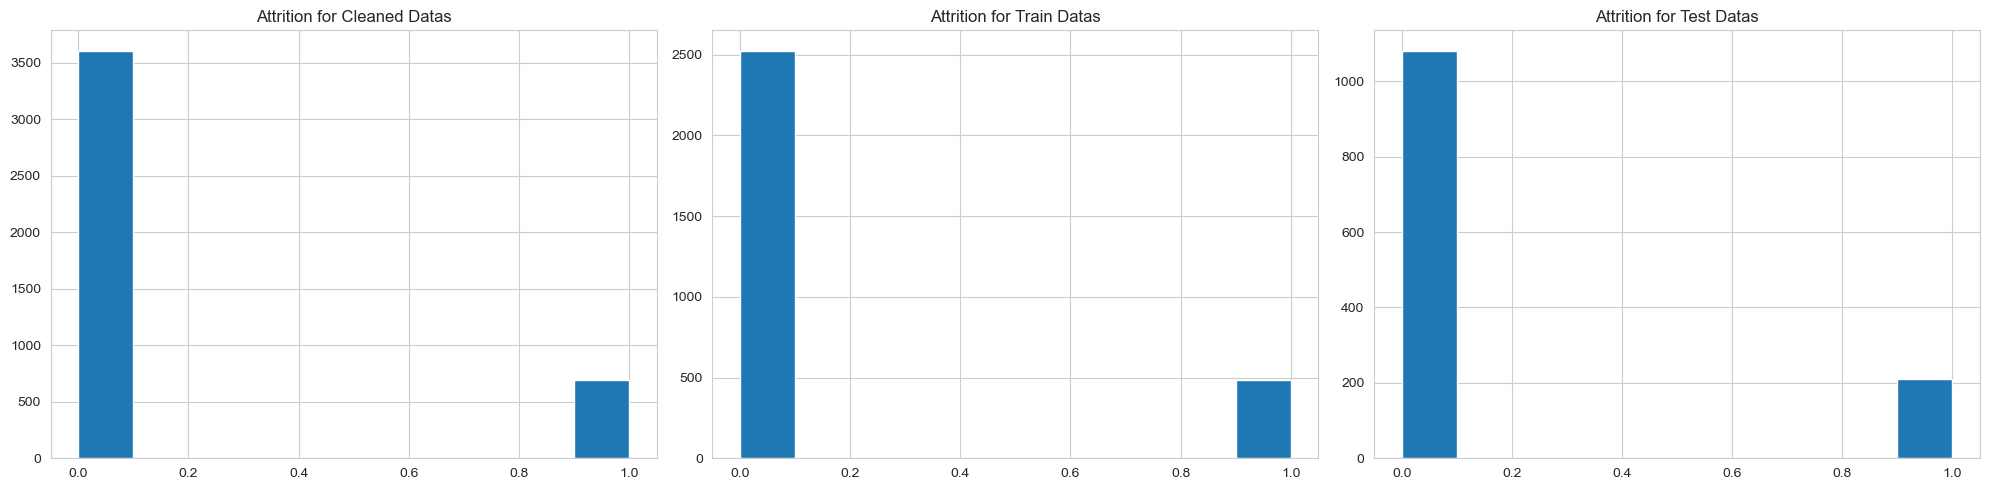

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].hist(cleaned_data["Attrition"])
axes[0].set_title('Attrition for Cleaned Datas')

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(cleaned_data, cleaned_data["Attrition"]):
    strat_train_set = cleaned_data.loc[train_index]
    strat_test_set = cleaned_data.loc[test_index]

axes[1].hist(strat_train_set["Attrition"])
axes[1].set_title('Attrition for Train Datas')

axes[2].hist(strat_test_set["Attrition"])
axes[2].set_title('Attrition for Test Datas')

plt.tight_layout()
plt.show()

## Test and train creation ##

In [22]:
x_train_set = strat_train_set.drop("Attrition",axis = 1)
y_train_set = strat_train_set["Attrition"].copy()

x_test_set = strat_test_set.drop("Attrition",axis = 1)
y_test_set = strat_test_set["Attrition"].copy()

## Creation of fonction for testing ##

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, RocCurveDisplay, precision_score, recall_score
from sklearn import tree, metrics

def Fit_Model(model):
    model.fit(x_train_set, y_train_set)
    return model

def Rnd_Search(param_distribs, classifier):
    rnd_search = RandomizedSearchCV(classifier,
                                    param_distributions=param_distribs,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1',
                                    random_state=42)

    rnd_search.fit(x_train_set, y_train_set)
    return rnd_search

def Grid_Search(param_grid, classifier):
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               scoring='f1',
                               return_train_score=True)
    grid_search.fit(x_train_set, y_train_set)
    return grid_search

def Get_Accuracy_Score(model):
    predictions = model.predict(x_test_set)
    return accuracy_score(y_test_set, predictions)

def Get_Precision_Score(model):
    predictions = model.predict(x_test_set)
    return precision_score(y_test_set, predictions)

def Get_Recall_Score(model):
    predictions = model.predict(x_test_set)
    return recall_score(y_test_set, predictions)

def Get_F1_Score(model):
    predictions = model.predict(x_test_set)
    return f1_score(y_test_set, predictions, zero_division=1)

def Get_ROC_Curve(model, name):
    predictions = model.predict(x_test_set)

    fpr, tpr, thresholds = metrics.roc_curve(y_test_set, predictions)
    auc = metrics.roc_auc_score(y_test_set, predictions)
    plt.plot(fpr , tpr, label = name + " AUC = " + str(auc))
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.legend(loc = 4, prop = {'size': 10})
    plt.title(name +' - ROC Curve', fontsize=12)
    plt.show()

def Get_Confusion_Matrix(model, name):
    y_pred = model.predict(x_test_set)

    conf_matrix = confusion_matrix(y_true = y_test_set, y_pred = y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title(name +' - Confusion Matrix', fontsize=12)
    plt.show()

def get_dt_graph(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,
                       feature_names = x_test_set.columns,
                       class_names=['Left', "Stay"],
                       filled=True)

def Get_Model_Indicators(model, name):
    model.fit(x_train_set, y_train_set)
    print (name + ' accuracy: ' + str(round(Get_Accuracy_Score(model) * 100, 2)) + '%')
    print(name + ' F1 Score :' + str(Get_F1_Score(model)))
    Get_Confusion_Matrix(model, name)
    Get_ROC_Curve(model, name)

# chargement des données 
On charge nos données déja nettoyées

In [25]:
import pandas as pd

cleaned_datas = pd.read_csv("datas/cleanedData.csv")
labels = pd.read_csv("datas/labels.csv")
cleaned_datas

,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,-0.439076,-0.161282,-0.394993,-0.891282,-1.738009,-0.964277,1.405193,-0.677226,-1.149725,-0.931939,...,1.513267,3.225808,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
1,2.277510,1.718161,0.099071,-1.867220,-1.737223,-0.964277,-0.492557,-1.077952,2.126858,0.239797,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
2,-0.439076,1.718161,0.963683,1.060595,-1.736437,1.746964,2.725773,-0.677226,-0.057531,2.583269,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
3,-0.439076,-2.040726,-0.889057,2.036534,-1.735651,0.843217,0.385846,0.124225,-1.149725,2.583269,...,-0.660822,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4,-0.439076,-0.161282,0.099071,-1.867220,-1.734864,-0.964277,-0.885202,0.524950,-0.876677,1.411533,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,-0.439076,-0.161282,-0.642025,0.084657,1.724337,-0.060530,-0.630737,-0.677226,0.761615,-0.931939,...,1.513267,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4296,-0.439076,-0.161282,-0.518509,1.060595,1.725123,-0.964277,-0.101400,0.124225,0.488567,0.239797,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
4297,-0.439076,-0.161282,-0.889057,1.060595,1.725910,-0.964277,-0.813561,-0.276501,-0.057531,-0.931939,...,-0.660822,-0.310000,-0.192728,2.163404,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4298,-0.439076,-0.161282,1.951811,-0.891282,1.726696,-0.060530,-0.596086,-1.077952,1.307712,-0.931939,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668


## Creation du jeu de test et d'entrainement

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( cleaned_datas[["MeanWorkingHours","BusinessTravel","EducationField_Human Resources", "WorkLifeBalance", "JobSatisfaction", "EnvironmentSatisfaction", "YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"]], labels["Attrition"], test_size=0.3, shuffle=True)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# SGD Classifier
## Entrainement

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

y_train_sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)


print(confusion_matrix(y_train, y_train_sgd_pred))

## Analyse de performances

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"recall : {precision_score(y_train, y_train_sgd_pred)}")
print(f"precision : {recall_score(y_train, y_train_sgd_pred)}")


f1_score(y_train, y_train_sgd_pred)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


fpr, tpr, thresholds = roc_curve(y_train, y_train_sgd_pred)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

# Perceptron Classifier

## Théorie

Voici un schéma de perceptron:

<img src="./images/X.png">

Ici:
- X représente nos entrées ($X_1$,$X_2$, ..., $X_n$)
- Ŷ représente notre sortie, notre prédiction.
- les $\omega$ ($\omega_1$,$\omega_2$, ..., $\omega_n$) représentent les poids a faire varier.

Avec ces données, voici la fonction F(X) q'utilisera notre perceptron:

$$ F(X) = ŷ = s \begin{pmatrix}\sum_{i=1}^n{(\omega_ix_i)+\omega_0}\end{pmatrix}$$


s représente notre fonction d'activation.
Etant en classification, notre fonction d'activation sera une fonction sigmoïde.

Ainsi: 
$$ F(X) = ŷ = \frac{1}{1+e^{\begin{pmatrix}\sum_{i=1}^n{(\omega_ix_i)+\omega_0}\end{pmatrix}}} $$


### Apprentissage
Pour apprendre il nous faut donc faire varier notre $w$ au fil des itérations. Nous allons utiliser pour cela la descente de gradient:

$$\omega _i^{t+1} = \omega_i^t-\eta\frac{\delta erreur}{\delta \omega _i^t}\\
\ \\
erreur(y_t,ŷ_t) = -y_t-log(ŷ_t)-(1--y_t-log(ŷ_t))\\
\ \\
donc\ \omega _i^{t+1} = \omega_i^t-\eta\frac{\delta (-y_t-log(ŷ_t)-(1--y_t-log(ŷ_t)))}{\delta \omega _i^t}$$

Pour l'erreur, on prend une entropie croisée étant en classification. On aurait pris une erreur quadratique pour de la regression.

$\eta$ représente notre learning rate, c'est la "vitesse d'apprentissage".

Le but va être au fil des itération, de minimiser nos erreurs et de maximiser nos prédictions.

## Entrainement



In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Perceptron_clf = Perceptron(tol=0.001, alpha=0.001)
Perceptron_clf.fit(X_train, y_train)

y_train_perceptron_pred = cross_val_predict(Perceptron_clf, X_train, y_train, cv=4)


print(confusion_matrix(y_train, y_train_perceptron_pred))

## Analyse des performances

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"recall : {precision_score(y_train, y_train_perceptron_pred)}")
print(f"precision : {recall_score(y_train, y_train_perceptron_pred)}")


f1_score(y_train, y_train_perceptron_pred)

NameError: name 'y_train' is not defined

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_perceptron_pred)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

# Decision Tree Classifier
Ici, on prendra différentes features, on va donc refaire un chargement des données
## Entrainement

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , f1_score, recall_score, precision_score

x_train, x_test, y_train, y_test = train_test_split(cleaned_datas.drop(columns=["Attrition", "EmployeeID"], axis=1), labels["Attrition"], test_size=0.3, shuffle=True)

from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(x_train, y_train)

a = cross_val_predict(tree_reg, x_train, y_train, cv=100)

print(a)

print(confusion_matrix(y_train, a))

print(recall_score(y_train, a))

print(precision_score(y_train, a))

print(f1_score(y_train, a))



## Testing

In [ ]:
from sklearn.metrics import mean_squared_error

tree_reg_test_predictions = tree_reg.predict(x_test)
tree_reg_train_predictions = tree_reg.predict(x_train)

print(confusion_matrix(y_test, tree_reg_test_predictions))

print(recall_score(y_test, tree_reg_test_predictions))

print(precision_score(y_test, tree_reg_test_predictions))

print(f1_score(y_test, tree_reg_test_predictions))

tree_mse = mean_squared_error(y_test, tree_reg_test_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, tree_reg_test_predictions)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show() 

# Random Forest
## data Loading 

In [ ]:
rf_cleaned_data = pd.read_csv("datas/cleanedData.csv")
rf_labels = pd.read_csv("datas/labels.csv")
rf_cleaned_data.drop("Attrition", axis=1, inplace=True)
rf_cleaned_data.insert(1,"Attrition", rf_labels["Attrition"])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].hist(rf_cleaned_data["Attrition"])
axes[0].set_title('Attrition for Cleaned Datas')

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(rf_cleaned_data, rf_cleaned_data["Attrition"]):
    strat_train_set = rf_cleaned_data.loc[train_index]
    strat_test_set = rf_cleaned_data.loc[test_index]

axes[1].hist(strat_train_set["Attrition"])
axes[1].set_title('Attrition for Train Datas')

axes[2].hist(strat_test_set["Attrition"])
axes[2].set_title('Attrition for Test Datas')

plt.tight_layout()
plt.show()

In [ ]:

x_train_set = strat_train_set.drop("Attrition",axis = 1)
y_train_set = strat_train_set["Attrition"].copy()

x_test_set = strat_test_set.drop("Attrition",axis = 1)
y_test_set = strat_test_set["Attrition"].copy()

## Training

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, RocCurveDisplay, precision_score, recall_score
from sklearn import tree, metrics

def Fit_Model(model):
    model.fit(x_train_set, y_train_set)
    return model

def Rnd_Search(param_distribs, classifier):
    rnd_search = RandomizedSearchCV(classifier,
                                    param_distributions=param_distribs,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1',
                                    random_state=42)

    rnd_search.fit(x_train_set, y_train_set)
    return rnd_search

def Grid_Search(param_grid, classifier):
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               scoring='f1',
                               return_train_score=True)
    grid_search.fit(x_train_set, y_train_set)
    return grid_search

def Get_Accuracy_Score(model):
    predictions = model.predict(x_test_set)
    return accuracy_score(y_test_set, predictions)

def Get_Precision_Score(model):
    predictions = model.predict(x_test_set)
    return precision_score(y_test_set, predictions)

def Get_Recall_Score(model):
    predictions = model.predict(x_test_set)
    return recall_score(y_test_set, predictions)

def Get_F1_Score(model):
    predictions = model.predict(x_test_set)
    return f1_score(y_test_set, predictions, zero_division=1)

def Get_ROC_Curve(model, name):
    predictions = model.predict(x_test_set)

    fpr, tpr, thresholds = metrics.roc_curve(y_test_set, predictions)
    auc = metrics.roc_auc_score(y_test_set, predictions)
    plt.plot(fpr , tpr, label = name + " AUC = " + str(auc))
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.legend(loc = 4, prop = {'size': 10})
    plt.title(name +' - ROC Curve', fontsize=12)
    plt.show()

def Get_Confusion_Matrix(model, name):
    y_pred = model.predict(x_test_set)

    conf_matrix = confusion_matrix(y_true = y_test_set, y_pred = y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title(name +' - Confusion Matrix', fontsize=12)
    plt.show()

def get_dt_graph(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,
                       feature_names = x_test_set.columns,
                       class_names=['Left', "Stay"],
                       filled=True)

def Get_Model_Indicators(model, name):
    model.fit(x_train_set, y_train_set)
    print (name + ' accuracy: ' + str(round(Get_Accuracy_Score(model) * 100, 2)) + '%')
    print(name + ' F1 Score :' + str(Get_F1_Score(model)))
    Get_Confusion_Matrix(model, name)
    Get_ROC_Curve(model, name)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

test_rfc = RandomForestClassifier()
Get_Recall_Score(test_rfc)
Get_Model_Indicators(test_rfc, "RandomForestClassifier")